# Project 6 Capstone - Part 2: Dataset Munging and Cleaning: Food Deserts

---

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
# Data Source: 
# Name: Food Deserts data for the United States
# Link: https://data.world/smartcolumbusos/978eac18-d4d0-4e36-8d1d-23aadd86a702/workspace/file?filename=food-deserts-data-for-the-usa-csv-1.csv
# Description: This dataset identifies the food deserts in the U.S., which includes the regions with low/limited access to food base don resident income levels and transportation availability.
# Data Dictionary: https://data.world/smartcolumbusos/978eac18-d4d0-4e36-8d1d-23aadd86a702/workspace/file?filename=data-dictionary-food-deserts-csv-2.csv
# (Also saved in Data Folder/Food_Deserts)

In [7]:
# Article - "Rising food insecurity in Alabama reflects national trends"
# Source: https://www.alreporter.com/2024/09/11/report-rising-food-insecurity-in-alabama-reflects-national-trends/
# "In Alabama, food insecurity rates mirror national averages, with an estimated 14 percent of households facing food insecurity."
# Alabama is a microcosm of america in terms of food insecurity

In [8]:
df = pd.read_csv('../data/Food_Deserts/food-deserts-data-for-the-usa-csv-1.csv')

In [9]:
df.shape

(1000, 147)

In [10]:
df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(102), int64(43), object(2)
memory usage: 1.1+ MB


In [12]:
df.isna().sum()

CensusTract      0
State            0
County           0
Urban            0
POP2010          0
                ..
TractAIAN        0
TractOMultir     0
TractHispanic    0
TractHUNV        0
TractSNAP        0
Length: 147, dtype: int64

In [13]:
df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [14]:
#New dataframe with just the columns I need:
new_df = df[['County', 'POP2010','PovertyRate', 'MedianFamilyIncome']]

# Project Capstone Part 3: Preprocessing + EDA
---

In [16]:
new_df.shape

(1000, 4)

In [17]:
new_df.isna().sum()

County                0
POP2010               0
PovertyRate           0
MedianFamilyIncome    0
dtype: int64

In [18]:
new_df.head(20)

,County,POP2010,PovertyRate,MedianFamilyIncome
0,Autauga,1912,10.0,74750
1,Autauga,2170,18.2,51875
2,Autauga,3373,19.1,52905
3,Autauga,4386,3.3,68079
4,Autauga,10766,8.5,77819
5,Autauga,3668,14.1,67218
6,Autauga,2891,26.4,43646
7,Autauga,3081,13.6,74284
8,Autauga,10435,13.8,68713
9,Autauga,5675,12.8,52994


In [19]:
new_df.corr

<bound method DataFrame.corr of       County  POP2010  PovertyRate  MedianFamilyIncome
0    Autauga     1912         10.0               74750
1    Autauga     2170         18.2               51875
2    Autauga     3373         19.1               52905
3    Autauga     4386          3.3               68079
4    Autauga    10766          8.5               77819
..       ...      ...          ...                 ...
995  Russell     3110         24.8               39400
996  Russell     7031         23.7               39625
997  Russell     6946         13.0               66477
998  Russell     3727         18.4               55717
999  Russell     1873         27.1               42206

[1000 rows x 4 columns]>

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              1000 non-null   object 
 1   POP2010             1000 non-null   int64  
 2   PovertyRate         1000 non-null   float64
 3   MedianFamilyIncome  1000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [21]:
new_df.describe()

,POP2010,PovertyRate,MedianFamilyIncome
count,1000.000000,1000.000000,1000.000000
mean,4043.984000,21.572100,52341.870000
std,2017.888797,13.165046,22761.317521
min,0.000000,0.000000,0.000000
25%,2538.750000,12.400000,37923.250000
50%,3769.000000,19.200000,48719.000000
75%,5059.250000,28.225000,61424.250000
max,13166.000000,79.100000,156542.000000


In [22]:
#new_df.value_counts('State')

<Figure size 1200x600 with 0 Axes>

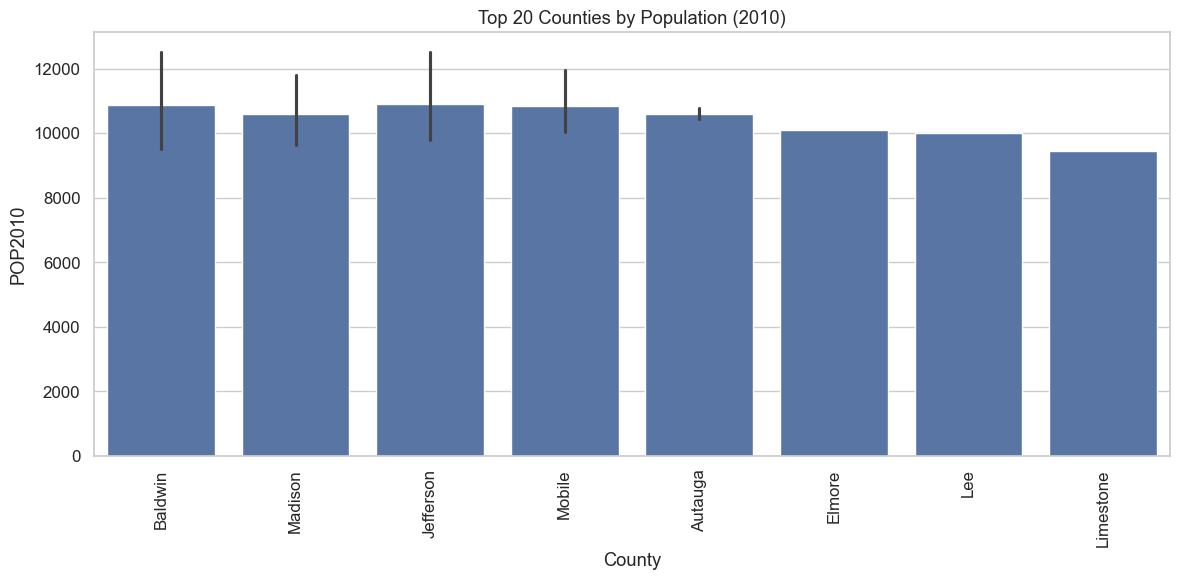

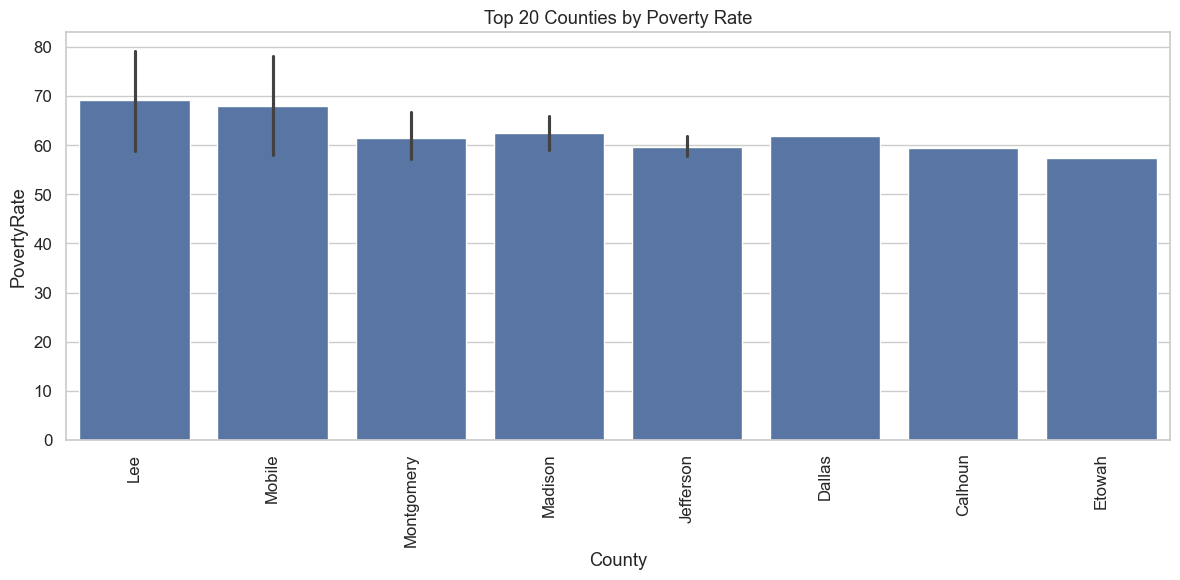

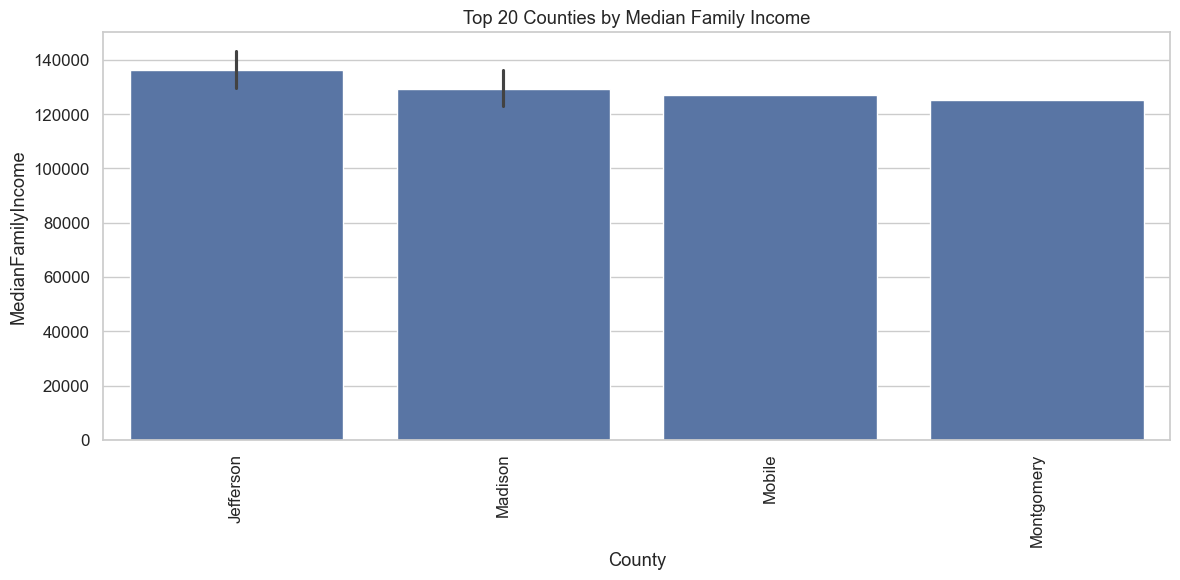

In [23]:
#Create plots
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))

# POP2010 vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='POP2010', data=new_df.sort_values('POP2010', ascending=False).head(20))
plt.title('Top 20 Counties by Population (2010)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# PovertyRate vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='PovertyRate', data=new_df.sort_values('PovertyRate', ascending=False).head(20))
plt.title('Top 20 Counties by Poverty Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MedianFamilyIncome vs County
plt.figure(figsize=(12, 6))
sns.barplot(x='County', y='MedianFamilyIncome', data=new_df.sort_values('MedianFamilyIncome', ascending=False).head(20))
plt.title('Top 20 Counties by Median Family Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Modeling
---

In [25]:
#Modeling

In [26]:
X = new_df[['POP2010', 'MedianFamilyIncome']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


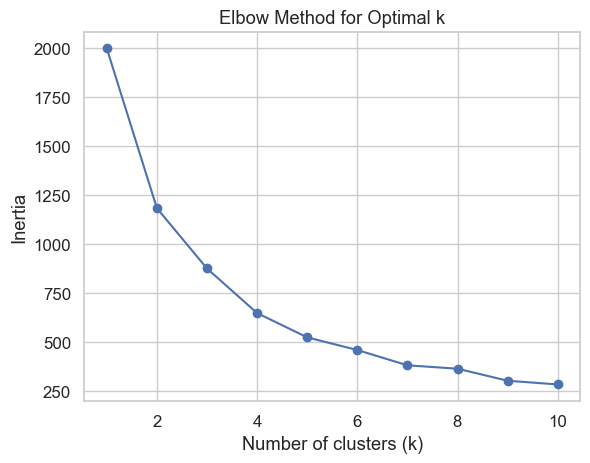

In [27]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
# optimal k is ?
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(X_scaled)


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_79978/3043693156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = kmeans.fit_predict(X_scaled)


In [29]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = new_df.groupby('Cluster').agg({
    'POP2010': 'mean',
    'MedianFamilyIncome': 'mean'
}).sort_values(by=['POP2010', 'MedianFamilyIncome'], ascending=False)

print(cluster_summary)


              POP2010  MedianFamilyIncome
Cluster                                  
5        10172.086957        87951.478261
7         7448.647887        50428.760563
2         6611.661017        80184.830508
6         4970.413978        53098.709677
0         3879.645161        36673.709677
1         3720.203704       111151.888889
4         2877.555556        62243.155556
3         1932.633333        33176.733333


In [30]:
# best cluster for business
best_cluster = cluster_summary.index[0]
best_counties = new_df[new_df['Cluster'] == best_cluster].sort_values(
    by=['POP2010', 'MedianFamilyIncome'], ascending=False
)

print("Top 10 Best Counties for Business:")
print(best_counties[['County', 'POP2010', 'MedianFamilyIncome']].head(10))


Top 10 Best Counties for Business:
        County  POP2010  MedianFamilyIncome
19     Baldwin    13166               88768
709    Madison    12621              124970
543  Jefferson    12502               98941
848     Mobile    11958               66990
699    Madison    11342               95644
4      Autauga    10766               77819
839     Mobile    10520               54641
8      Autauga    10435               68713
476  Jefferson    10433               92893
843     Mobile    10046               75108


In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg:.3f}")

# Calculate inertia
inertia = kmeans.inertia_
print(f"The inertia is: {inertia:.3f}")


The average silhouette score is: 0.443
The inertia is: 15436534561.065


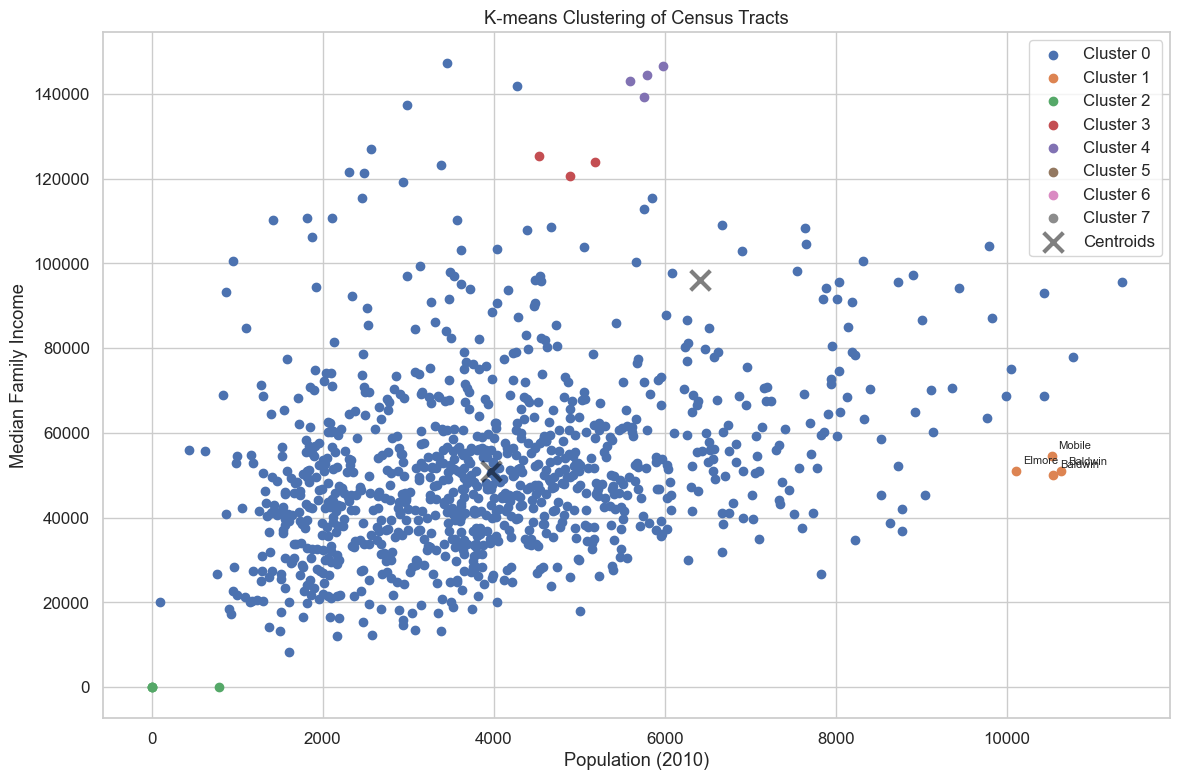

In [88]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_data = new_df[new_df['Cluster'] == i]
    plt.scatter(cluster_data['POP2010'], cluster_data['MedianFamilyIncome'], 
                label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(cluster_centers['POP2010'], cluster_centers['MedianFamilyIncome'], 
            c='black', s=200, alpha=0.5, marker='x', linewidths=3, 
            label='Centroids')

plt.xlabel('Population')
plt.ylabel('Median Family Income')
plt.title('K-means Clustering of Census Tracts')
plt.legend()

# Add text annotations for the best cluster
best_cluster_data = new_df[new_df['Cluster'] == best_cluster]
for idx, row in best_cluster_data.iterrows():
    plt.annotate(row['County'], (row['POP2010'], row['MedianFamilyIncome']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


In [31]:
#Model 2

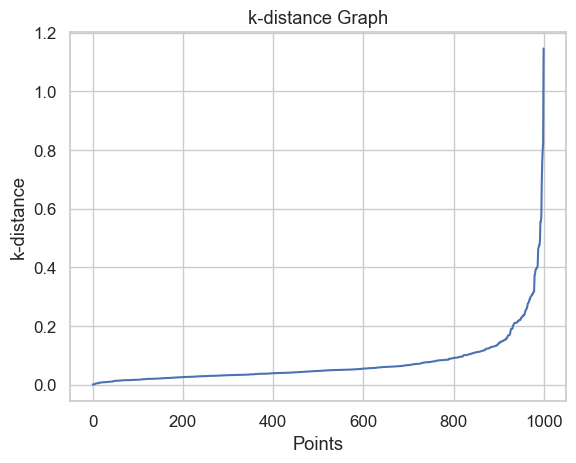

              POP2010  MedianFamilyIncome
Cluster                                  
 1       10447.500000        51692.250000
-1        8553.000000       115911.100000
 4        5779.500000       143326.000000
 3        4867.666667       123299.333333
 0        3977.580513        51315.680000
 2         200.500000            0.000000

Top 10 Best Counties for Business:
      County  POP2010  MedianFamilyIncome
33   Baldwin    10632               50883
40   Baldwin    10534               50139
839   Mobile    10520               54641
270   Elmore    10104               51106


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_79978/2791189114.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = dbscan.fit_predict(X_scaled)


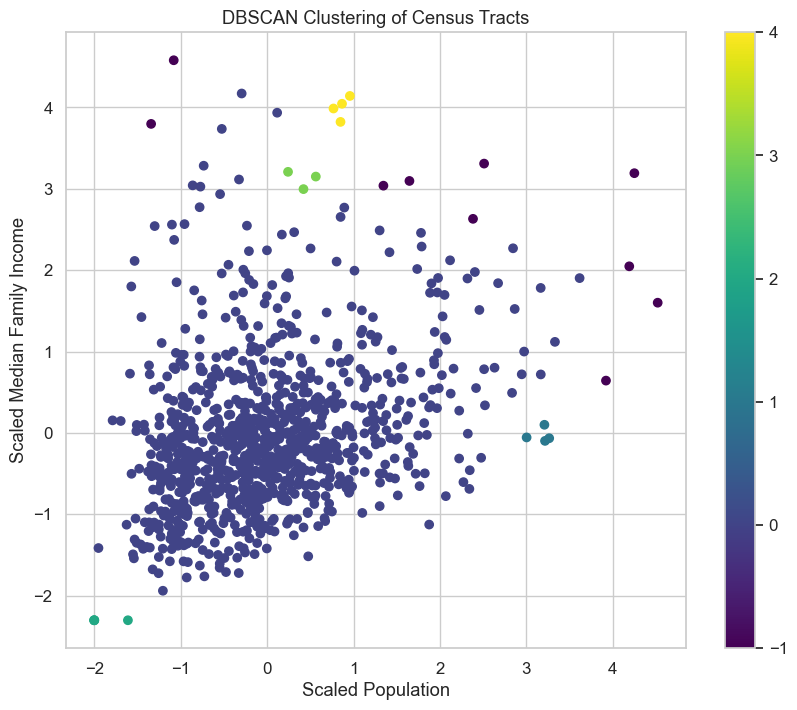

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Prepare the data
X = new_df[['POP2010', 'MedianFamilyIncome']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

# Choose epsilon based on the elbow in the k-distance graph
epsilon = 0.5

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=3)
new_df['Cluster'] = dbscan.fit_predict(X_scaled)

# Analyze the clusters
cluster_summary = new_df.groupby('Cluster').agg({
    'POP2010': 'mean',
    'MedianFamilyIncome': 'mean'
}).sort_values(by=['POP2010', 'MedianFamilyIncome'], ascending=False)

print(cluster_summary)

# Identify the best cluster for business (excluding noise points labeled as -1)
best_cluster = cluster_summary.loc[cluster_summary.index != -1].index[0]
best_counties = new_df[new_df['Cluster'] == best_cluster].sort_values(
    by=['POP2010', 'MedianFamilyIncome'], ascending=False
)

print("\nTop 10 Best Counties for Business:")
print(best_counties[['County', 'POP2010', 'MedianFamilyIncome']].head(10))

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=new_df['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Scaled Population')
plt.ylabel('Scaled Median Family Income')
plt.title('DBSCAN Clustering of Census Tracts')
plt.show()


In [33]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, new_df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg:.3f}")

# Calculate inertia (sum of squared distances to cluster centers)
cluster_centers = new_df.groupby('Cluster')[['POP2010', 'MedianFamilyIncome']].mean()
inertia = 0
for cluster in new_df['Cluster'].unique():
    if cluster != -1:  # Exclude noise points
        cluster_points = X_scaled[new_df['Cluster'] == cluster]
        cluster_center = cluster_centers.loc[cluster].values
        inertia += np.sum(pairwise_distances(cluster_points, [cluster_center], metric='euclidean')**2)

print(f"The inertia is: {inertia:.3f}")


The average silhouette score is: 0.566
The inertia is: 2544347384021.328


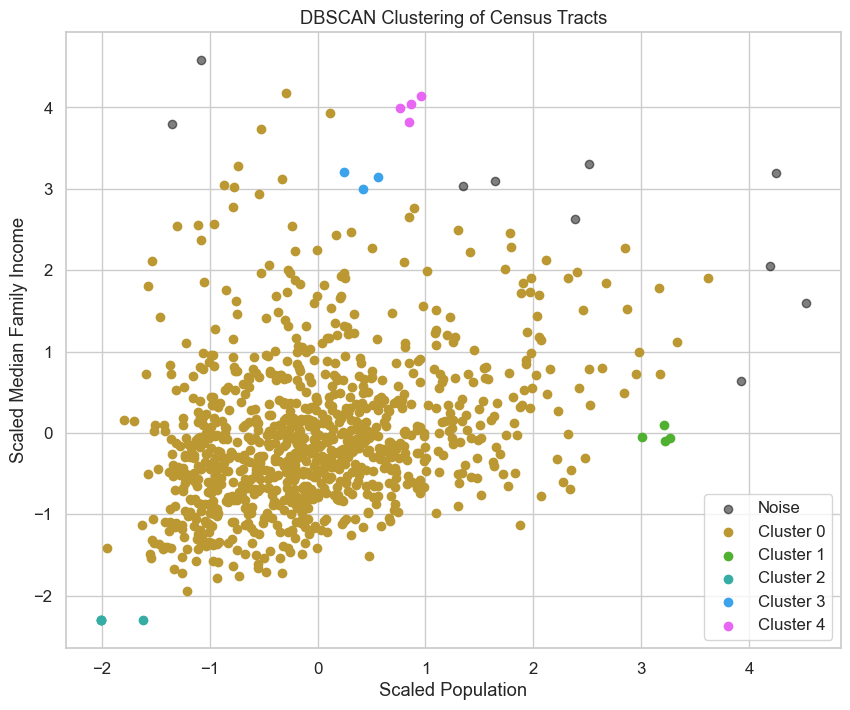

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique cluster labels
unique_labels = np.unique(new_df['Cluster'])

# Create a color palette with enough colors
palette = sns.color_palette("husl", len(unique_labels))

# Create the scatter plot
plt.figure(figsize=(10, 8))
for label, color in zip(unique_labels, palette):
    if label == -1:
        # Plot noise points as black
        cluster_points = X_scaled[new_df['Cluster'] == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='black', label='Noise', alpha=0.5)
    else:
        cluster_points = X_scaled[new_df['Cluster'] == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}')

plt.xlabel('Scaled Population')
plt.ylabel('Scaled Median Family Income')
plt.title('DBSCAN Clustering of Census Tracts')
plt.legend()
plt.show()
